In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_data = pd.read_csv('data/death-rates-from-air-pollution.csv')
country_data = pd.read_csv('data/countries.csv')
industry_index = pd.read_csv('data/VVP111.csv', sep=',')

In [3]:
air_data_copy = air_data.copy()
country_data_copy = country_data.copy()
industry_index_copy = industry_index.copy()

In [4]:
country_data_copy[country_data_copy['Name'] == 'Congo']

,Code,Name,Native,Phone,Continent,Capital,Currency,Languages


In [5]:
# удалим ненужные колонки
industry_index_copy = industry_index_copy.drop(industry_index_copy.columns[3], axis=1)
industry_index_copy = industry_index_copy.drop(industry_index_copy.columns[-1], axis=1)
industry_index_copy = industry_index_copy.drop(industry_index_copy.columns[2], axis=1)


def char_replace(value):
    """функция замены двух двойных кавычек в ячейке на 0 и удаления одинарных кавычек

    Args:
        value (str): передаваемая в функцию строка

    Returns:
        str: очищенная строка
    """
    return value.replace("\"\"", "0").replace('"', '')
    
    
# удалим из ячеек кавычки
industry_index_copy = industry_index_copy.applymap(char_replace)


# преобразуем столбцы в числовые
for idx, column in enumerate(industry_index_copy.columns):
    if idx > 1 and industry_index_copy[column].dtype == 'object':
        try:
            industry_index_copy[column] = industry_index_copy[column].astype('Float64')
            # industry_index_copy[column] = pd.to_numeric(industry_index_copy[column])
        except ValueError as e:
            print(f"Произошла ошибка при преобразовании столбца {column}: {e}")
            

# удалим из названий столбцов кавычки и пробелы по краям названий столбцов
industry_index_copy.rename(columns=lambda x: x.replace('"', ''), inplace=True)
industry_index_copy.rename(columns=lambda x: x.strip(), inplace=True)


industry_index_copy_T = industry_index_copy.T

# industry_country_codes = pd.DataFrame(industry_index_copy_T.iloc[1])


# создадим результирующую таблицу с ВВП по годам каждой страны
result_vvp_table = pd.DataFrame()
for column in industry_index_copy_T:   
    temp = industry_index_copy_T[[column]]
    temp['year'] = temp.index
    temp['code'] = temp.iloc[1,0]
    temp.reset_index(drop=True,inplace=True)
    temp.rename(columns={temp.columns[0]: 'value, $mils'},inplace=True)
    temp.drop([0,1], inplace=True)
    temp.reset_index(drop=True,inplace=True)
    result_vvp_table = pd.concat([result_vvp_table, temp], ignore_index=True)
    
result_vvp_table['year'] = result_vvp_table['year'].astype('int64')
result_vvp_table['code'] = result_vvp_table['code'].str.strip()

# приведем значение ВВП к миллионам для удобства
result_vvp_table['value, $mils'] = pd.to_numeric(result_vvp_table['value, $mils']) / 1000000
result_vvp_table['value, $mils'] = result_vvp_table['value, $mils'].round(1)



/tmp/ipykernel_7069/2044045254.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['year'] = temp.index
/tmp/ipykernel_7069/2044045254.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['code'] = temp.iloc[1,0]
/tmp/ipykernel_7069/2044045254.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(colum

In [6]:
result_vvp_table

,"value, $mils",year,code
0,0.0,1960,ABW
1,0.0,1961,ABW
2,0.0,1962,ABW
3,0.0,1963,ABW
4,0.0,1964,ABW
...,...,...,...
16753,34156.1,2018,ZWE
16754,21832.2,2019,ZWE
16755,21509.7,2020,ZWE
16756,28371.2,2021,ZWE


In [6]:
columns_to_exclude = ['Name', 'Continent']

country_data_filtered = country_data_copy[columns_to_exclude]

In [7]:
air_data_merged = pd.merge(air_data_copy, country_data_filtered, left_on='Entity', right_on='Name', how='left')

air_data_merged.drop('Name', axis=1, inplace=True)

In [8]:
print('Shape of data: {}'.format(air_data_copy.shape))
display(air_data_copy.head())

indoor_deaths = air_data_merged['Indoor air pollution (deaths per 100,000)']
outdoor_deaths = air_data_merged['Outdoor particulate matter (deaths per 100,000)']
ozone_deaths = air_data_merged['Outdoor ozone pollution (deaths per 100,000)']

air_data_merged['Air pollution (total) (deaths per 100,000)'] = indoor_deaths + outdoor_deaths + ozone_deaths

print('Shape of data: {}'.format(air_data_merged.shape))
display(air_data_merged.head())

Shape of data: (6468, 7)


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


Shape of data: (6468, 8)


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent
0,Afghanistan,AFG,1990,302.425941,250.362910,46.446589,5.616442,Asia
1,Afghanistan,AFG,1991,294.212926,242.575125,46.033841,5.603960,Asia
2,Afghanistan,AFG,1992,281.899466,232.043878,44.243766,5.611822,Asia
3,Afghanistan,AFG,1993,281.743548,231.648134,44.440148,5.655266,Asia
4,Afghanistan,AFG,1994,290.150427,238.837177,45.594328,5.718922,Asia


In [9]:
# объединим таблицы, добавив ВВП
air_data_merged = pd.merge(air_data_merged, result_vvp_table, left_on=['Code', 'Year'], right_on=['code', 'year'], how='left')

In [10]:
air_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           6468 non-null   object 
 1   Code                                             5488 non-null   object 
 2   Year                                             6468 non-null   int64  
 3   Air pollution (total) (deaths per 100,000)       6468 non-null   float64
 4   Indoor air pollution (deaths per 100,000)        6468 non-null   float64
 5   Outdoor particulate matter (deaths per 100,000)  6468 non-null   float64
 6   Outdoor ozone pollution (deaths per 100,000)     6468 non-null   float64
 7   Continent                                        5208 non-null   object 
 8   value, $mils                                     5432 non-null   float64
 9   year                          

In [11]:
air_data_merged.dropna(subset=['Code'], inplace=True)
air_data_merged.dropna(subset=['code'], inplace=True)

air_data_merged.drop(['year', 'code'], axis=1, inplace=True)

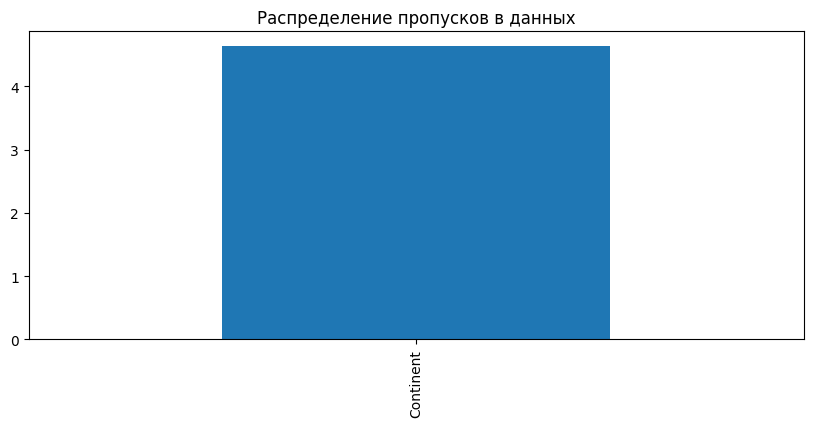

In [12]:
cols_null_persent = air_data_merged.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
# display(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

In [13]:
display(air_data_merged[air_data_merged['Continent'].isnull()])

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent,"value, $mils"
1344,Congo,COG,1990,201.804183,153.470659,43.403385,4.930138,NaN,2798.7
1345,Congo,COG,1991,195.925818,147.872971,43.215064,4.837782,NaN,2724.9
1346,Congo,COG,1992,193.344740,145.669773,42.871519,4.803448,NaN,2933.2
1347,Congo,COG,1993,191.779417,143.819335,43.162275,4.797807,NaN,2684.3
1348,Congo,COG,1994,195.582063,146.690053,43.995928,4.896082,NaN,1769.4
...,...,...,...,...,...,...,...,...,...
6127,United States Virgin Islands,VIR,2013,31.517892,1.275977,29.982422,0.259492,NaN,3738.0
6128,United States Virgin Islands,VIR,2014,30.745206,1.289090,29.187186,0.268931,NaN,3565.0
6129,United States Virgin Islands,VIR,2015,31.074930,1.289125,29.503636,0.282169,NaN,3663.0
6130,United States Virgin Islands,VIR,2016,29.499777,1.249903,27.961917,0.287957,NaN,3798.0


In [14]:
display(air_data_merged[air_data_merged['Continent'] != 'NaN'])

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent,"value, $mils"
0,Afghanistan,AFG,1990,302.425941,250.362910,46.446589,5.616442,Asia,0.0
1,Afghanistan,AFG,1991,294.212926,242.575125,46.033841,5.603960,Asia,0.0
2,Afghanistan,AFG,1992,281.899466,232.043878,44.243766,5.611822,Asia,0.0
3,Afghanistan,AFG,1993,281.743548,231.648134,44.440148,5.655266,Asia,0.0
4,Afghanistan,AFG,1994,290.150427,238.837177,45.594328,5.718922,Asia,0.0
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,145.471991,113.456097,27.589603,4.426291,Africa,19091.0
6464,Zimbabwe,ZWE,2014,139.761154,108.703566,26.760618,4.296971,Africa,19495.5
6465,Zimbabwe,ZWE,2015,134.256828,104.340506,25.715415,4.200907,Africa,19963.1
6466,Zimbabwe,ZWE,2016,130.153030,100.392287,25.643570,4.117173,Africa,20548.7


In [15]:
display(air_data_merged[air_data_merged['Continent'].isna()]['Entity'].unique())

array(['Congo', "Cote d'Ivoire", 'Democratic Republic of Congo',
       'Macedonia', 'Micronesia (country)', 'Myanmar', 'Swaziland',
       'Timor', 'United States Virgin Islands'], dtype=object)

In [17]:
display(air_data_merged[air_data_merged['Entity'] == 'Russia'])

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent,"value, $mils"
4676,Russia,RUS,1990,63.564936,0.309374,60.914783,2.340778,Asia,516814.3
4677,Russia,RUS,1991,64.074979,0.286228,61.499819,2.288932,Asia,517963.0
4678,Russia,RUS,1992,67.912801,0.277267,65.255770,2.379764,Asia,460290.6
4679,Russia,RUS,1993,79.992017,0.311501,76.932413,2.748103,Asia,435083.7
4680,Russia,RUS,1994,85.896555,0.331246,82.651810,2.913500,Asia,395077.3
4681,Russia,RUS,1995,79.195327,0.299233,76.171461,2.724633,Asia,395537.2
4682,Russia,RUS,1996,75.497869,0.269332,72.669166,2.559371,Asia,391724.9
4683,Russia,RUS,1997,71.841704,0.247413,69.173937,2.420354,Asia,404929.0
4684,Russia,RUS,1998,70.219801,0.236308,67.652970,2.330523,Asia,270955.5
4685,Russia,RUS,1999,74.704531,0.250439,71.977117,2.476974,Asia,195907.1
